<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico - Grupo 4 (cohorte 2)</h1>
<h3> Análisis y Curación de Datos - 2020 </h3>

In [15]:
import matplotlib.pyplot as plt
import pandas
import seaborn
import numpy
import sys

In [16]:
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."
    
pandas.options.display.float_format = '{:.2f}'.format

# Formatos de Datos - CSV

## Ejercicio

1. Descargar dataset en CSV
    Tablas de Peso
    Basado en material de https://www.cdc.gov/growthcharts/percentile_data_files.htm

    https://www.cdc.gov/growthcharts/data/zscore/wtageinf.csv

2. Graficar las curvas correspondientes a cada percentil para niños y niñas

    a. En la columna Sex, 1 representa a niños y 2 a niñas

    b. Las curvas de los percentiles correspondientes a un mismo sexo deben ir en un mismo
gráfico.

    c. Un gráfico para cada sexo

In [17]:
dataset = pandas.read_csv('https://www.cdc.gov/growthcharts/data/zscore/wtageinf.csv')
dataset.shape

(76, 14)

In [18]:
dataset.head(5)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.00,1.82,3.53,0.15,2.36,2.53,2.77,3.15,3.53,3.88,4.17,4.34,4.45
1,1,0.50,1.55,4.00,0.15,2.80,2.96,3.21,3.60,4.00,4.39,4.72,4.91,5.03
2,1,1.50,1.07,4.88,0.14,3.61,3.77,4.02,4.43,4.88,5.33,5.73,5.97,6.12
3,1,2.50,0.70,5.67,0.13,4.34,4.50,4.75,5.18,5.67,6.18,6.64,6.92,7.11
4,1,3.50,0.42,6.39,0.12,4.99,5.16,5.42,5.87,6.39,6.94,7.46,7.78,7.99


Seleccionamos las columnas con las cuales vamos a trabajar:

In [19]:
cols = ['Agemos'] + [col for col in dataset.columns if 'P' in col]

Definimos 2 dataset, uno para varones y otro para mujeres, y reacomodamos los dataset para poder graficarlos, mediante la function melt:

In [20]:
df_varones = pandas.melt(dataset[dataset.Sex == 1][cols], 'Agemos')
df_mujeres = pandas.melt(dataset[dataset.Sex == 2][cols], 'Agemos')

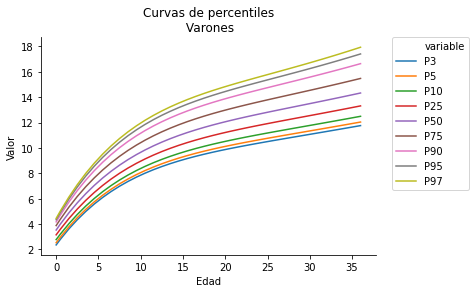

In [21]:
seaborn.lineplot(x="Agemos", y="value", hue='variable', data=df_varones)
plt.title('Curvas de percentiles\n Varones')
plt.ylabel('Valor')
plt.xlabel('Edad')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

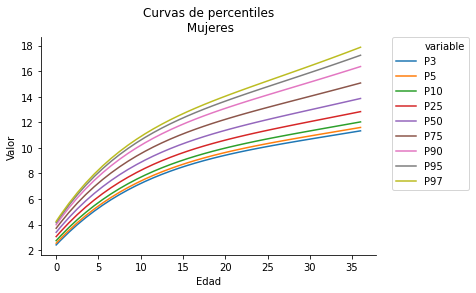

In [22]:
seaborn.lineplot(x="Agemos", y="value", hue='variable', data=df_mujeres)
plt.title('Curvas de percentiles\n Mujeres')
plt.ylabel('Valor')
plt.xlabel('Edad')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

# Formato de Datos - JSON

## Ejercicio

1. Descargar dataset en JSON:
    Pasos Fronterizos
    https://github.com/DiploDatos/AnalisisYCuracion/blob/master/input/pasos.json

2. Graficar un gráfico de barras agrupando por valor del atributo “province”.

In [23]:
json = pandas.read_json(BASE_DIR + '/input/pasos.json')
json.shape

(252, 3)

Armamos un dataset agrupando por provincia y lo graficamos:

In [24]:
data = json.province.value_counts()

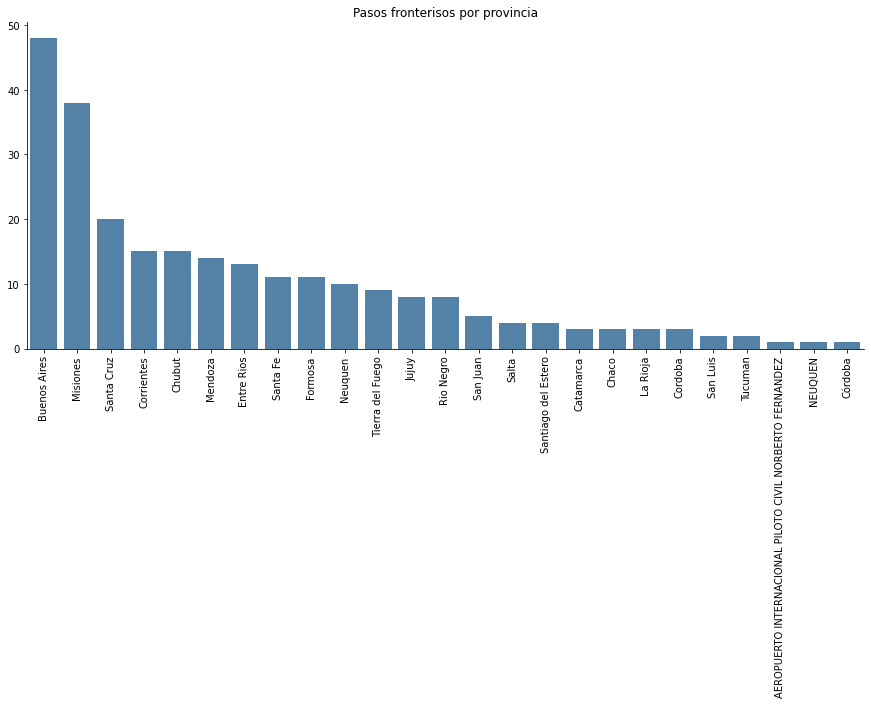

In [25]:
plt.figure(figsize=(15, 6))
plt.title('Pasos fronterisos por provincia')
seaborn.barplot(x=data.index, y=data.values, color='steelblue')
plt.xticks(rotation=90)
seaborn.despine()

Al graficar el barplot, se evidencian varios errores presentes en el dataset. Por ejemplo, hay un aeropuerto clasificado como Provincia, y hay Provincias repetidas cuyo nombre varía en la presencia o no de un tilde (como Córdoba), o varía por cómo está definido (Neuquén está en minúscula y en mayúscula).

# Representación de Datos - Grafos

## Ejercicio

A continuación, a partir del grafo propuesto durante la clase, definimos una lista de pares ordenados, una matriz de adyacencia y una lista de adjacencia:

In [26]:
# Lista de pares ordenados
edgeList = [[0,2], [1,3], [2,3], [2,4], [3,5], [4,5]];
edgeList

[[0, 2], [1, 3], [2, 3], [2, 4], [3, 5], [4, 5]]

In [27]:
# Matriz de adjacencia
adjMatrix = numpy.zeros(shape=(6,6))

for nodo in edgeList:
    x = nodo[0]
    y = nodo[1]
    adjMatrix[x,y] = 1

adjMatrix

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.]])

In [28]:
# Lista de adjacencia
adjList = []
for nodo in edgeList:
    if ((len(adjList) == 0) or ((len(adjList)-1) < nodo[0])):
        adjList.insert(nodo[0], [nodo[1]])
    else:
        tmp = adjList[nodo[0]]
        tmp.append(nodo[1])
        adjList[nodo[0]] = tmp
adjList

[[2], [3], [3, 4], [5], [5]]

# Limpieza de Datos


Veamos de importar datos de proyectos de Kickstarter la plataforma de Crowdsourcing.

# 1.1 Verificar que no hay problemas en la importación

In [29]:
kickstarter_2018 = pandas.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
                                   parse_dates=["deadline","launched"],
                                   index_col=['ID'])

Veamos el resumen de los datos

In [30]:
kickstarter_2018.describe(include='all')

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,378657,378661,378661,378661,378661,378661.00,378661,378661.00,378661,378661.00,378661,374864.00,378661.00,378661.00
unique,375764,159,15,14,3164,nan,378089,nan,6,nan,23,nan,nan,nan
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08 00:00:00,nan,1970-01-01 01:00:00,nan,failed,nan,US,nan,nan,nan
freq,41,22314,63585,295365,705,nan,7,nan,197719,nan,292627,nan,nan,nan
first,NaN,NaN,NaN,NaN,2009-05-03 00:00:00,nan,1970-01-01 01:00:00,nan,NaN,nan,NaN,nan,nan,nan
last,NaN,NaN,NaN,NaN,2018-03-03 00:00:00,nan,2018-01-02 15:02:31,nan,NaN,nan,NaN,nan,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,49080.79,NaN,9682.98,NaN,105.62,NaN,7036.73,9058.92,45454.40
std,NaN,NaN,NaN,NaN,NaN,1183391.26,NaN,95636.01,NaN,907.19,NaN,78639.75,90973.34,1152950.06
min,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.00,NaN,0.00,NaN,0.00,0.00,0.01
25%,NaN,NaN,NaN,NaN,NaN,2000.00,NaN,30.00,NaN,2.00,NaN,16.98,31.00,2000.00


Podemos ver que tenemos primero y último en el resumen de las columnas de fechas.

# 1.2 Asegurar de tener ids/claves únicas

## Ejercicio 1

Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados.

In [31]:
df_duplicados  = kickstarter_2018[kickstarter_2018[['name','category','main_category']].duplicated()]
df_duplicados

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1039093987,New EP/Music Development,Music,Music,USD,2016-01-07,3800.00,2015-11-24 15:29:35,257.00,undefined,0,"N,0""",nan,257.00,3800.00
1046840222,Quick Quests: TCG,Tabletop Games,Games,USD,2016-09-01,1000.00,2016-08-20 03:31:20,436.00,failed,16,US,304.00,436.00,1000.00
1091088385,The Pitch,Shorts,Film & Video,USD,2011-11-03,11000.00,2011-09-04 06:28:11,3310.00,failed,18,US,3310.00,3310.00,11000.00
1108565605,New EP/Music Development,Music,Music,USD,2016-01-28,3000.00,2015-12-21 20:39:56,40.00,undefined,0,"N,0""",nan,40.00,3000.00
1117967622,New EP/Music Development,Music,Music,USD,2015-12-14,3000.00,2015-11-09 18:46:47,431.00,undefined,0,"N,0""",nan,431.00,3000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995318657,Stötta Vandringsbloggen Community,Publishing,Publishing,SEK,2016-12-31,30000.00,2016-11-20 00:14:36,100.00,canceled,2,SE,10.81,11.09,3325.87
99598621,Romeo & Juliet,Plays,Theater,USD,2017-09-18,3000.00,2017-08-31 16:02:20,3061.00,successful,60,US,200.00,3061.00,3000.00
997076604,Lie Detector App,Apps,Technology,USD,2015-03-12,10000.00,2015-02-10 12:05:18,0.00,failed,0,US,0.00,0.00,10000.00


# 1.3 Despersonalizar datos y guardarlos en un nuevo archivo

In [32]:
from hashlib import md5

In [33]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

kickstarter_2018['name_hash'] = kickstarter_2018['name'].apply(hashit)

#### Ejercicio 2

Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado.

In [34]:
kickstarter_2018[kickstarter_2018[['name','name_hash']].duplicated(keep=False)][['name','name_hash']].sort_values('name')


,name,name_hash
ID,,
816998285,"""...The Last shall be first..."" LODB Lifestyle...",0c7a251ffe4c7834cbc4b04906952ff1
815783250,"""...The Last shall be first..."" LODB Lifestyle...",0c7a251ffe4c7834cbc4b04906952ff1
1010584633,"""A Fresh Start""",67554ab4203d95f2f2f05365f768206e
713417995,"""A Fresh Start""",67554ab4203d95f2f2f05365f768206e
1880084695,"""American Sports Stories"" - An Athletic Quest",19a82bc4c5961834282575d07d9b5f7c
...,...,...
329580179,xxx (Canceled),930857c212f21166427b23d4a7fe52a3
1848699072,NaN,nan
634871725,NaN,nan


Se observa en las primeras filas a un par de proyectos duplicados, y que mantienen el mismo hash.

# Pasos necesarios

## 2.1 Etiquetas de variables/columnas: no usar caracteres especiales

Chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ en los nombres de columnas

In [35]:
kickstarter_2018.columns[~kickstarter_2018.columns.str.match(r'^(\w+)$')]

Index(['usd pledged'], dtype='object')

In [36]:
kickstarter_2018.columns = kickstarter_2018.columns.str.replace(' ', '_')
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_hash
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,81609b3bdc0b96f429672d69702f2524
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,c12f5c3bace2f0213cdb2679a265dca0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,9c01404a2ef702811c2088ce139042ad


#### Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

Para esto vamos a usar un módulo específico [ftfy](https://ftfy.readthedocs.io/en/latest/). 

Que nos permite ordenar cadenas por rareza

In [37]:
if 'ftfy' not in sys.modules:
    !pip install 'ftfy<5.6'
    
import ftfy.badness as bad

     |████████████████████████████████| 51kB 1.7MB/s 


In [38]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

In [39]:
# Primero, calculamos la cantidad de nombres raros en el dataset cargado originalmente
kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
print('Se encontraron', len(kickstarter_2018[kickstarter_2018['name_weirdness'] > 1]), 'nombres raros.')

Se encontraron 26 nombres raros.


In [40]:
# Ahora, calcularemos la cantidad de nombres raros en el dataset, pero cargándolo con eoncoding ISO-8859-1

# read in the file with the encoding detected by chardet
kickstarter_2018_1 = pandas.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", encoding='iso-8859-1')

# look at the first few lines
kickstarter_2018_1.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00


In [41]:
kickstarter_2018_1['name_weirdness'] = kickstarter_2018_1['name'].apply(weird)
print('Se encontraron', len(kickstarter_2018_1[kickstarter_2018_1['name_weirdness'] > 1]), 'nombres raros.')

Se encontraron 7682 nombres raros.


## 2.2 Tratar valores faltantes

Ejemplo, cuantos de los proyectos suspendidos no tienen nombre

In [42]:
len(kickstarter_2018[kickstarter_2018.state == 'suspended'].dropna(subset=['name'])) / \
    len(kickstarter_2018[kickstarter_2018.state == 'suspended'])

0.9994582881906826

En este caso, creemos que es seguro descartar los proyectos sin nombre

In [43]:
kickstarter_2018 = kickstarter_2018.dropna(subset=['name'])

Cuantos proyectos tienen campos con valores nulos

In [44]:
missing_values_count = kickstarter_2018.isnull().sum()
missing_values_count[missing_values_count > 0]

usd_pledged    3797
dtype: int64

In [45]:
kickstarter_2018[kickstarter_2018.usd_pledged.isnull()].describe(include='all')

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_hash,name_weirdness
count,3797,3797,3797,3797,3797,3797.00,3797,3797.00,3797,3797.00,3797,0.00,3797.00,3797.00,3797,3797.00
unique,3764,28,12,10,722,nan,3797,nan,6,nan,1,nan,nan,nan,3764,nan
top,New EP/Music Development,Music,Music,USD,2015-05-01 00:00:00,nan,2015-10-27 17:00:11,nan,undefined,nan,"N,0""",nan,nan,nan,2cdff1887ad0f0d341ca3f08841de3a0,nan
freq,28,2387,2388,2738,26,nan,1,nan,3562,nan,3797,nan,nan,nan,28,nan
first,NaN,NaN,NaN,NaN,2012-04-24 00:00:00,nan,2012-03-14 19:05:44,nan,NaN,nan,NaN,nan,nan,nan,NaN,nan
last,NaN,NaN,NaN,NaN,2016-07-07 00:00:00,nan,2016-05-21 20:45:12,nan,NaN,nan,NaN,nan,nan,nan,NaN,nan
mean,NaN,NaN,NaN,NaN,NaN,5413.35,NaN,3023.26,NaN,0.00,NaN,nan,2949.85,5097.31,NaN,-0.01
std,NaN,NaN,NaN,NaN,NaN,37466.24,NaN,44919.41,NaN,0.00,NaN,nan,44881.72,37258.79,NaN,0.12
min,NaN,NaN,NaN,NaN,NaN,108.00,NaN,0.00,NaN,0.00,NaN,nan,0.00,85.28,NaN,-3.00
25%,NaN,NaN,NaN,NaN,NaN,2000.00,NaN,5.00,NaN,0.00,NaN,nan,5.00,2250.00,NaN,0.00


A priori como los proyectos no tienen patrocinantes, completamos en 0 los valores

In [46]:
kickstarter_2018 = kickstarter_2018.fillna(0)

## 2.3 Codificar variables

Para trabajar con los algoritmos de aprendizaje automático, las variables categóricas estas deben ser codificadas como variables numéricas, no como cadenas.

Para esta tarea también hay diferentes estrategias, dos comunes son: asociar cadena a número y asociar cadena a columna.

In [47]:
from sklearn import preprocessing

In [48]:
column='main_category'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])

LabelEncoder()

In [49]:
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

{'Art': 0,
 'Comics': 1,
 'Crafts': 2,
 'Dance': 3,
 'Design': 4,
 'Fashion': 5,
 'Film & Video': 6,
 'Food': 7,
 'Games': 8,
 'Journalism': 9,
 'Music': 10,
 'Photography': 11,
 'Publishing': 12,
 'Technology': 13,
 'Theater': 14}

In [50]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_hash,name_weirdness
ID,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,12,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,6,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,81609b3bdc0b96f429672d69702f2524,0
1000004038,Where is Hank?,Narrative Film,6,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,c12f5c3bace2f0213cdb2679a265dca0,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,10,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,6,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,9c01404a2ef702811c2088ce139042ad,0


#### Ejercicio 4
Codificar currency con ambas estrategias

In [51]:
column='currency'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])

LabelEncoder()

In [52]:
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [53]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_hash,name_weirdness
ID,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,12,5,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,6,13,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,81609b3bdc0b96f429672d69702f2524,0
1000004038,Where is Hank?,Narrative Film,6,13,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,c12f5c3bace2f0213cdb2679a265dca0,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,10,13,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,6,13,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,9c01404a2ef702811c2088ce139042ad,0


In [54]:
# Reversing encoding
kickstarter_2018[column] = le.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_hash,name_weirdness
ID,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,12,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,a6828ae8a2eca25f0dd7035efc0af0a0,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,6,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,81609b3bdc0b96f429672d69702f2524,0
1000004038,Where is Hank?,Narrative Film,6,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,c12f5c3bace2f0213cdb2679a265dca0,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,10,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,4dbdcf09c86bbf5683ec39bc57b77f81,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,6,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,9c01404a2ef702811c2088ce139042ad,0


In [55]:
from sklearn.preprocessing import LabelBinarizer
other_column = 'currency'

lb = LabelBinarizer()

lb_results = lb.fit_transform(kickstarter_2018[other_column])
pandas.DataFrame(lb_results, columns=((other_column + '_') + pandas.Series(lb.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## 2.4 No cambiar los nombres de las variables de la fuente de origen


## 2.5 Verificar la consistencia de las variables
Aplicar reglas de integridad

#### Ejercicio 5

1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?


In [56]:
df_exitoso_NO = kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)]
df_exitoso_SI = kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged >= kickstarter_2018.goal)]
print("Proyectos exitosos que NO consiguieron el objetivo ", len(df_exitoso_NO), '('+str(round((len(df_exitoso_NO)/len(kickstarter_2018)*100), 3))+'%)')
print("Proyectos exitosos que SI consiguieron el objetivo ", len(df_exitoso_SI), '('+str(round((len(df_exitoso_SI)/len(kickstarter_2018)*100), 3))+'%)')

Proyectos exitosos que NO consiguieron el objetivo  5 (0.001%)
Proyectos exitosos que SI consiguieron el objetivo  133951 (35.375%)


In [57]:
kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_hash,name_weirdness
ID,,,,,,,,,,,,,,,,
1368992939,Santa's Sled,Art,0,USD,2012-08-27,3600.00,2012-07-26 03:31:28,3599.69,successful,64,US,3599.69,3599.69,3600.00,92f6e4970773ace6a1a5834f969aa063,0
1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Shorts,6,USD,2015-12-27,36000.00,2015-11-12 19:06:18,30716.00,successful,275,US,30716.00,30716.00,36000.00,a9df06a2771d5b16d9bc1565e01d6f74,0
251325270,Documentary film about Les Blank.,Documentary,6,USD,2010-07-18,8000.00,2010-06-02 22:15:38,7999.65,successful,73,US,7999.65,7999.65,8000.00,8d98ff9795b5f284d716f851e41e344a,0
4732285,Insiders/Out: Exploring Outsider Art in America,Art,0,USD,2010-07-08,2000.00,2010-05-27 00:26:33,1999.66,successful,30,US,1999.66,1999.66,2000.00,c746e76b03e0b8a1fa80816821f7ebb7,0
780863434,TUW Ruhla Watches - Comeback of a Legend,Product Design,4,EUR,2016-03-19,25000.00,2016-02-08 19:14:02,24892.50,successful,90,DE,27778.24,27765.07,27884.98,61e9a198771a6c2b2ae6fb50d96eccbe,0


Sí, hay proyectos exitosos que no consigueron el objetivo. Sin embargo, este grupo representa un 0.0013% respecto del total. Es decir, prácticamente un 100% de los proyectos catalogados como "succesfull" lograron el objetivo planteado inicialmente.

2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [58]:
df_cat_state_counts = kickstarter_2018.groupby(["main_category", "state"], as_index= False).count()[["main_category", "state", "name"]]
df_cat_state_counts.pivot_table(values='name',index='state',columns='main_category')

main_category,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
state,,,,,,,,,,,,,,,
canceled,2222.00,842.00,843.00,163.00,4152.00,2650.00,5755.00,2211.00,6202.00,523.00,3305.00,986.00,3602.00,4715.00,608.00
failed,14130.00,4036.00,5703.00,1235.00,14814.00,14182.00,32903.00,15969.00,16002.00,3137.00,21752.00,6384.00,23145.00,20616.00,3708.00
live,194.00,76.00,76.00,18.00,305.00,250.00,332.00,184.00,287.00,31.00,281.00,48.00,299.00,377.00,41.00
successful,11510.00,5842.00,2115.00,2338.00,10550.00,5593.00,23623.00,6085.00,12518.00,1012.00,24197.00,3305.00,12300.00,6434.00,6534.00
suspended,96.00,23.00,72.00,13.00,246.00,138.00,117.00,153.00,220.00,52.00,149.00,55.00,66.00,424.00,21.00
undefined,nan,nan,nan,1.00,2.00,3.00,854.00,nan,1.00,nan,2234.00,1.00,462.00,3.00,1.00


## 2.6. Identificar y documentar valores atípicos/outliers

Queremos analizar las características de los proyectos que obtienen dinero pero sin considerar los casos atípicos.

#### Ejercicio 6

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text major ticklabel objects>)

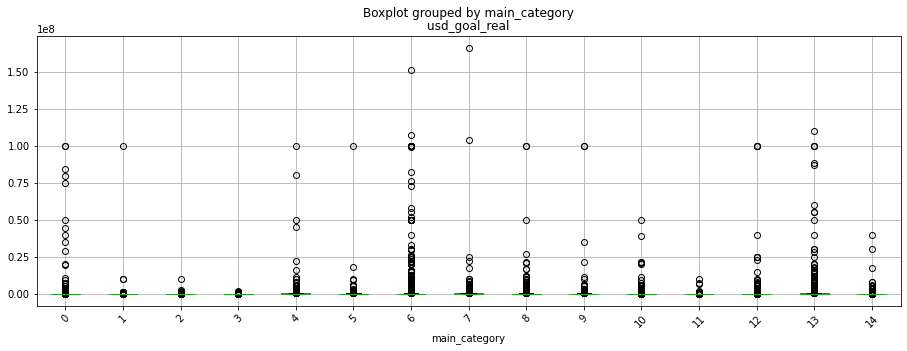

In [59]:
# Boxplot de "usd_goal_real" con outliers incluidos, por categoría de proyecto.

kickstarter_2018.boxplot(column='usd_goal_real',by='main_category', figsize=(15,5))
plt.xticks(rotation=45)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 15 Text major ticklabel objects>)

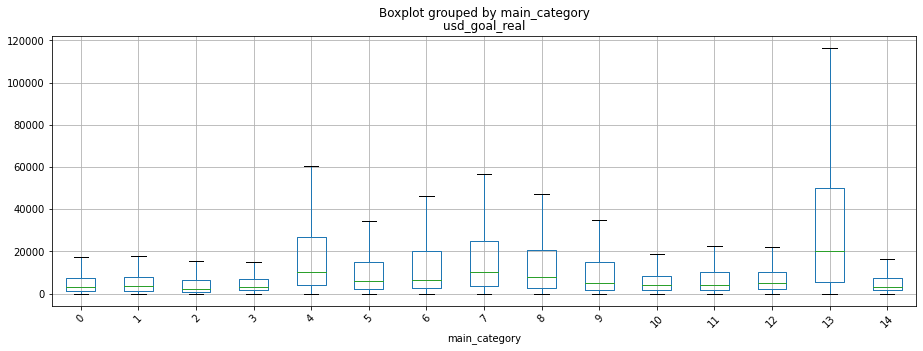

In [60]:
# Boxplot de "usd_goal_real" con outliers excluidos, por categoría de proyecto.

kickstarter_2018.boxplot(column='usd_goal_real',by='main_category', figsize=(15,5), showfliers = False)
plt.xticks(rotation=45)

# Ingestión de Datos - SQL

## Ejercicio 

Descargar DB de ejemplo. Realizar la siguiente consulta:
*  Canciones de Iron Maiden
*  Discos con más de 25 canciones
*  Las 10 canciones más populares

A continuación, se muestra el código para la consulta SQL del ejercicio planteado.

* Canciones de Iron Maiden

```
SELECT tracks.name
FROM tracks
INNER JOIN albums
    ON albums.albumid = tracks.albumid
INNER JOIN artists
    ON artists.artistid = albums.artistid
WHERE artists.name = 'Iron Maiden'
```

* Discos con más de 25 canciones

```
SELECT albums.title,
         count(tracks.trackid) AS canciones
FROM albums
INNER JOIN tracks
    ON tracks.albumid = albums.albumid
GROUP BY  albums.albumid
HAVING canciones > 25
ORDER BY  canciones desc
```
* Las 10 canciones más populares

```
SELECT tracks.name,
         count(playlist_track.trackid) AS playlists
FROM tracks
INNER JOIN playlist_track
    ON playlist_track.trackid = tracks.trackid
GROUP BY  tracks.name
ORDER BY  playlists DESC limit 10
```



Reescribir la siguiente consulta con JOIN:

```
SELECT trackid, name
FROM tracks
WHERE albumid = 
    (SELECT albumid
    FROM albums
    WHERE title = "Let There Be Rock");
```

Respuesta:

```
SELECT trackid, name
FROM tracks
INNER JOIN albums
	ON albums.albumid = tracks.albumid
WHERE title = "Let There Be Rock"
```

# Ingestión de Datos - RSS

## Ejercicio

Descargar títulos de artículos de Tecnología de La Voz del Interior

In [61]:
pip install feedparser

     |████████████████████████████████| 194kB 2.8MB/s 
  Created wheel for feedparser: filename=feedparser-5.2.1-cp36-none-any.whl size=44940 sha256=93b5893146dd465432f72ea9b976c93d9e75b0614beb026b9175628706b49489
  Stored in directory: /root/.cache/pip/wheels/8c/69/b7/f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
Successfully built feedparser


In [62]:
import feedparser

# Se obtienen los datos, y se imprimen los nombres de los artículos del mismo

lavoz_datos = feedparser.parse("https://www.lavoz.com.ar/rss/tecnologia.xml")
for articulo in lavoz_datos['entries']:
    print("-", articulo['title'])

- Ransomware: un ataque de hackers afectó el sistema interno de Telecom
- El nuevo altavoz inalámbrico de Sony integra un mando para escuchar la televisión en cualquier parte de la casa
- Los hackers descargaron el historial de datos de 8 de las cuentas afectadas por el ataque a Twitter
- Tamales, montoncito de dedos y trans: estos son los nuevos emojis que llegan a iPhone en septiembre
- Día Mundial del Emoji: cuáles son sus significados según el contexto cultural
- Twitter confirmó que fueron 130 las cuentas hackeadas
- Zoom soluciona un fallo de seguridad en la personalización de url que permitía lanzar campañas de phishing
- Ultra rápida: lanzan un sistema que carga el 33% de la batería del celu en tres minutos
- La explicación de Twitter al hackeo masivo de cuentas
- Hackearon las cuentas de Twitter de Obama, Biden y Gates
- Facebook transmitirá videos musicales con licencia oficial a partir de agosto
- Google Maps permite calibrar la ubicación del usuario con Live View
- El nuevo